In [24]:
`import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "maharshi@1234",
                             database = "ecommerce")
cur = db.cursor()


 List all unique cities where customers are located.

In [11]:
query = """ select distinct customer_city from customers"""

cur.execute(query)

data = cur.fetchall()

data


[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

#2. Count the number of orders placed in 2017.

In [14]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are", data[0][0]


('total orders placed in 2017 are', 225505)

Find the total sales per category.

In [2]:
query = """ select upper(products.product_category) category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

df =pd.DataFrame(data, columns = ["Category", "Sales"])
df


,Category,Sales
0,PERFUMERY,3.243127e+07
1,FURNITURE DECORATION,9.153129e+07
2,TELEPHONY,3.116045e+07
3,FASHION BAGS AND ACCESSORIES,1.396213e+07
4,BED TABLE BATH,1.096034e+08
...,...,...
69,CDS MUSIC DVDS,7.676352e+04
70,LA CUISINE,1.864659e+05
71,FASHION CHILDREN'S CLOTHING,5.028288e+04
72,PC GAMER,1.391635e+05


 Calculate the percentage of orders that were paid in installments.

In [30]:
query = """ select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments
""" 

cur.execute(query)

data = cur.fetchall()
"the percentage of orders that were paid in installments",data[0][0]


('the percentage of orders that were paid in installments', Decimal('99.9981'))

5. Count the number of customers from each state.
   


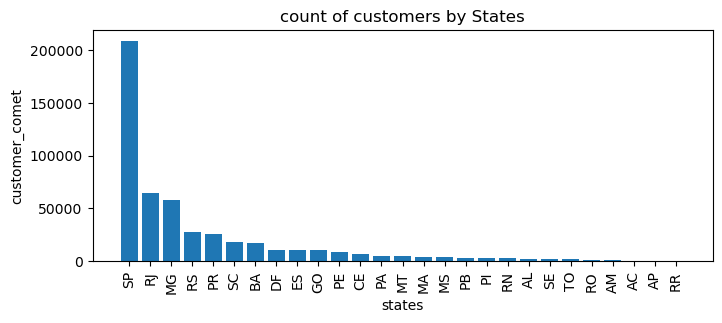

In [17]:
query = """ select customer_state ,count(customer_id)
from customers group by customer_state
""" 

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count" ])
df = df.sort_values(by = "customer_count", ascending= False)

plt.figure(figsize = (8,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_comet")
plt.title("count of customers by States")

plt.show()


1. Calculate the number of orders per month in 2018.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "maharshi@1234",
                             database = "ecommerce")
cur = db.cursor()


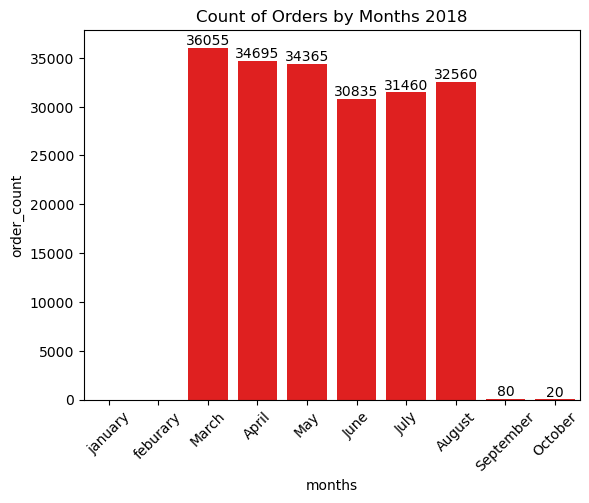

In [19]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
""" 

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months","order_count"])
o = ["january","feburary","March","April","May","June","July","August","September","October"]
ax = sns.barplot(x = df["months"],y = df["order_count"],data = df, order = o, color = "red")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months 2018")
plt.show()

2. Find the average number of products per order, grouped by customer city.
   

In [ ]:
query = """ with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city

""" 

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city", "average products/order"])
df.head(10)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "maharshi@1234",
                             database = "ecommerce")
cur = db.cursor()


3. Calculate the percentage of total revenue contributed by each product category.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "maharshi@1234",
                             database = "ecommerce")                             
cur = db.cursor()
query = """
select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df.head()






,Category,percentage distribution
0,BED TABLE BATH,171.16
1,HEALTH BEAUTY,165.65
2,COMPUTER ACCESSORIES,158.45
3,FURNITURE DECORATION,142.94
4,WATCHES PRESENT,142.84


 Identify the correlation between product price and the number of times a product has been purchased.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np
db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "maharshi@1234",
                             database = "ecommerce")                             
cur = db.cursor()

query = """select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category","order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a= np.corrcoef([arr1,arr2])
print("the correleation between price and number of times a product has been purchased is", a[0][1])


the correleation between price and number of times a product has been purchased is -0.10631514167157563


 #Calculate the total revenue generated by each seller, and rank them by revenue.


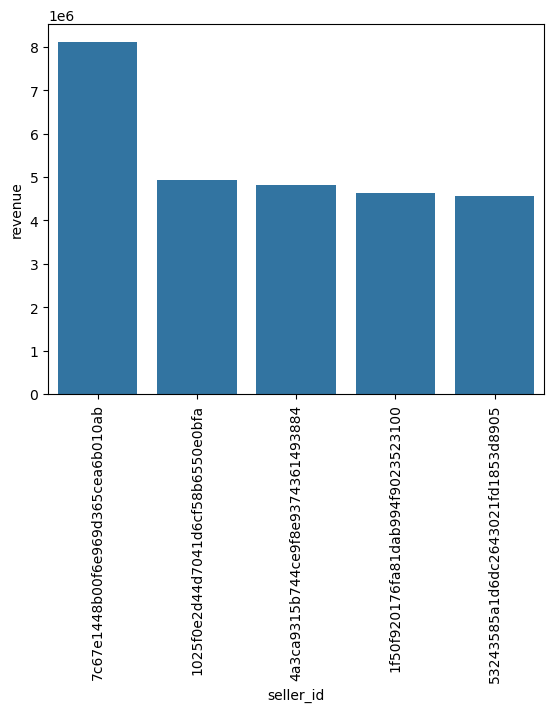

[('7c67e1448b00f6e969d365cea6b010ab', 8114670.516834259, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 4931552.6374435425, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 4819924.316244602, 3),
 ('1f50f920176fa81dab994f9023523100', 4644054.722041845, 4),
 ('53243585a1d6dc2643021fd1853d8905', 4558449.287963867, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 4355509.109034538, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 4226657.935020447, 7),
 ('955fee9216a65b617aa5c0531780ce60', 3781156.808036238, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 3304211.6779174805, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 2962147.3553009033, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 2874523.9847733974, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 2704492.800409794, 12),
 ('25c5c91f63607446a97b143d2d535d31', 2568555.8363609314, 13),
 ('a1043bafd471dff536d0c462352beb48', 2469710.563026428, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 2381829.441131592, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 2325104.6420898438, 16),
 ('620c87c1

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np
db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "maharshi@1234",
                             database = "ecommerce")                             
cur = db.cursor()
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value) 
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()
data

 #Calculate the moving average of order values for each customer over their order history.
 #Advanced_question
 --------------------------------
 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np
db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "maharshi@1234",
                             database = "ecommerce")                             
cur = db.cursor()
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df




,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
2077715,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
2077716,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
2077717,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
2077718,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


calculate the cummulative sales per month for each year

In [7]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulativesales from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,5044.80,5.044800e+03
1,2016,10,1181809.60,1.186854e+06
2,2016,12,392.40,1.187247e+06
3,2017,1,2769760.80,3.957008e+06
4,2017,2,5838160.19,9.795168e+06
5,2017,3,8997271.99,1.879244e+07
6,2017,4,8355760.59,2.714820e+07
7,2017,5,11858376.40,3.900658e+07
8,2017,6,10225527.61,4.923210e+07
9,2017,7,11847658.39,6.107976e+07


calculate the year over year growth rate of total sales.


In [2]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment,1) over(order by years)) * 100 from a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth" ])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703758
2,2018,20.000924


#calculate the retention rate of customers, defined as the percentage of customers who make another purchase

In [23]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp <
date_add(first_order, interval 6 month)
group by a.customer_id)

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id ;"""
cur.execute(query)
data = cur.fetchall()
data 



[(None,)]

identify the top3 customers who spent the most money in each year.

<function matplotlib.pyplot.show(close=None, block=None)>

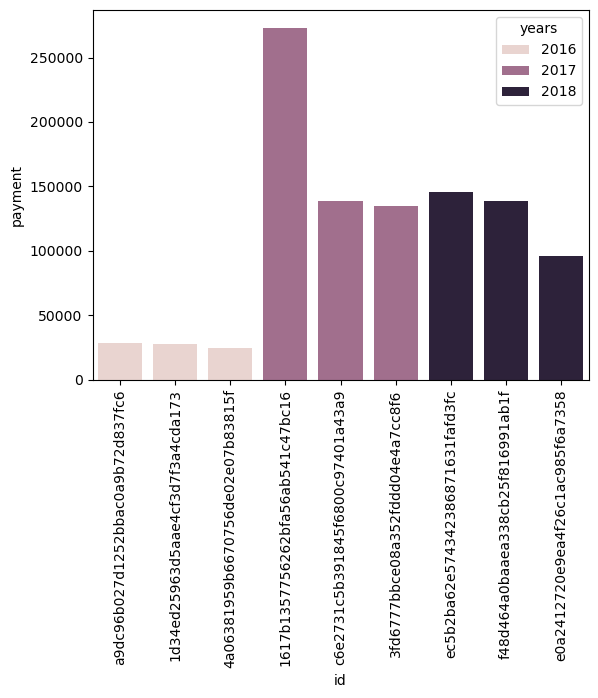

In [19]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "id", "payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()

